In [1]:
import os
from pathlib import Path

iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
if iskaggle: path = Path('../input/titanic')
else:
    path = Path('titanic')
    if not path.exists():
        import zipfile,kaggle
        kaggle.api.competition_download_cli(str(path))
        zipfile.ZipFile(f'{path}.zip').extractall(path)

In [2]:
import torch, numpy as np, pandas as pd
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)

In [3]:
# get data into pandas.DataFrame
# clear from nand values
# fix data distribution
# fix non numerical data
# create indep and dep data

In [4]:
df = pd.read_csv(path / 'train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
modes = df.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [7]:
df.fillna(modes, inplace = True)

In [8]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
df.describe(include = (np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

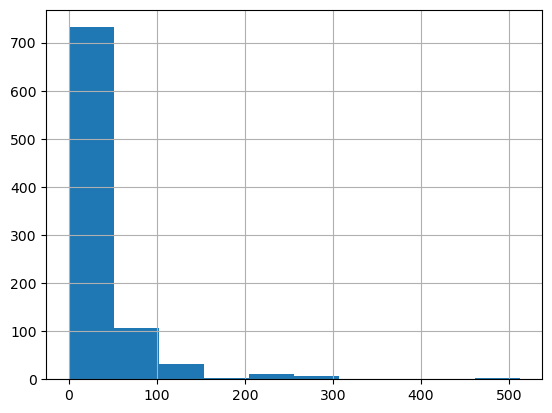

In [10]:
df['Fare'].hist()

<Axes: >

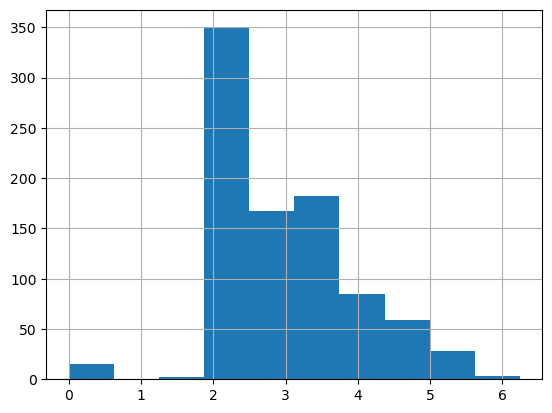

In [11]:
df['LogFare'] = np.log(df['Fare'] + 1)
df['LogFare'].hist()

In [12]:
pclasses = sorted(df.Pclass.unique())
pclasses

[1, 2, 3]

In [13]:
df.describe(include = [object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,1601,B96 B98,S
freq,1,577,7,691,646


In [14]:
df = pd.get_dummies(df, columns = [ 'Sex', 'Pclass', 'Embarked' ])
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [15]:
added_cols = ['Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
df[added_cols].head()

,Sex_male,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0,0,1,0,0,1
1,0,1,1,0,0,1,0,0
2,0,1,0,0,1,0,0,1
3,0,1,1,0,0,0,0,1
4,1,0,0,0,1,0,0,1


In [16]:
from torch import tensor
t_dep = tensor(df.Survived)

In [17]:
indep_cols = ['Age', 'SibSp', 'Parch', 'LogFare'] + added_cols

t_indep = tensor(df[indep_cols].values, dtype=torch.float)
t_indep

tensor([[22.0000,  1.0000,  0.0000,  2.1102,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [38.0000,  1.0000,  0.0000,  4.2806,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000],
        [26.0000,  0.0000,  0.0000,  2.1889,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  1.0000,  0.0000,  3.9908,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  0.0000,  0.0000,  2.2028,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [24.0000,  0.0000,  0.0000,  2.2469,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000],
        [54.0000,  0.0000,  0.0000,  3.9677,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        ...,
        [25.0000,  0.0000,  0.0000,  2.0857,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [39.0000,  0.0000,  5.0000,  3.4054

In [18]:
t_indep.shape

torch.Size([891, 12])

In [19]:
torch.manual_seed(442)
n_coeff = t_indep.shape[1]
coeffs = torch.randn(n_coeff) - 0.5
coeffs

tensor([-1.1635,  1.6909,  1.1907, -1.8283, -0.3960,  1.0108, -0.8941, -0.1175, -1.4742, -0.7084, -2.1337, -1.3082])

In [20]:
vals, indices = t_indep.max(dim = 0)
vals

tensor([80.0000,  8.0000,  6.0000,  6.2409,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000])

In [21]:
vals2, indices2 = t_indep.max(dim = 1)
len(vals2)

891

In [22]:
t_indep = t_indep / vals
t_indep.shape

torch.Size([891, 12])

In [23]:
t_indep * coeffs

tensor([[-0.3200,  0.2114,  0.0000, -0.6182, -0.3960,  0.0000, -0.0000, -0.0000, -1.4742, -0.0000, -0.0000, -1.3082],
        [-0.5527,  0.2114,  0.0000, -1.2540, -0.0000,  1.0108, -0.8941, -0.0000, -0.0000, -0.7084, -0.0000, -0.0000],
        [-0.3781,  0.0000,  0.0000, -0.6412, -0.0000,  1.0108, -0.0000, -0.0000, -1.4742, -0.0000, -0.0000, -1.3082],
        [-0.5090,  0.2114,  0.0000, -1.1691, -0.0000,  1.0108, -0.8941, -0.0000, -0.0000, -0.0000, -0.0000, -1.3082],
        [-0.5090,  0.0000,  0.0000, -0.6453, -0.3960,  0.0000, -0.0000, -0.0000, -1.4742, -0.0000, -0.0000, -1.3082],
        [-0.3490,  0.0000,  0.0000, -0.6582, -0.3960,  0.0000, -0.0000, -0.0000, -1.4742, -0.0000, -2.1337, -0.0000],
        [-0.7853,  0.0000,  0.0000, -1.1623, -0.3960,  0.0000, -0.8941, -0.0000, -0.0000, -0.0000, -0.0000, -1.3082],
        ...,
        [-0.3636,  0.0000,  0.0000, -0.6110, -0.3960,  0.0000, -0.0000, -0.0000, -1.4742, -0.0000, -0.0000, -1.3082],
        [-0.5672,  0.0000,  0.9923, -0.9976

In [24]:
preds = (t_indep * coeffs).sum(axis = 1)
preds.shape

torch.Size([891])

In [25]:
loss = torch.abs(preds - t_dep).mean()
loss

tensor(3.7009)

In [26]:
def calc_preds(coeffs, indeps): 
    return (indeps * coeffs).sum(axis = 1)
def calc_loss(coeffs, indeps, deps): 
    return torch.abs(calc_preds(coeffs, indeps) - deps).mean()

In [27]:
coeffs.requires_grad_()

tensor([-1.1635,  1.6909,  1.1907, -1.8283, -0.3960,  1.0108, -0.8941, -0.1175, -1.4742, -0.7084, -2.1337, -1.3082], requires_grad=True)

In [28]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(3.7009, grad_fn=<MeanBackward0>)

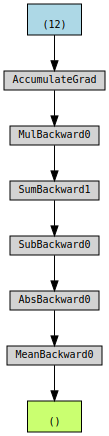

In [29]:
from torchviz import make_dot
make_dot(loss)

In [30]:
loss.backward()

In [31]:
coeffs.grad

tensor([-0.3571, -0.0654, -0.0636, -0.4746, -0.6476, -0.3524, -0.2424, -0.2065, -0.5511, -0.1886, -0.0864, -0.7250])

In [32]:
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    coeffs.grad.zero_()
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(3.5131)


In [33]:
from fastai.data.transforms import RandomSplitter
trn_split, val_split = RandomSplitter(seed = 42)(df)

/home/mark/miniconda3/envs/py10/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [34]:
trn_indep, val_indep = t_indep[trn_split], t_indep[val_split]
trn_dep, val_dep = t_dep[trn_split], t_dep[val_split]
len(trn_indep), len(val_indep)

(713, 178)

In [35]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_()
def one_epoch(coeffs, lr, trn_indep, trn_dep):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.5f}", end="; ")
def init_coeffs(n_coeff):
    return (torch.rand(n_coeff) - 0.5).requires_grad_()

In [36]:
def train_model(trn_indep, trn_dep, epochs = 30, lr = 0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs(trn_indep.shape[1])
    for i in range(epochs):
        one_epoch(coeffs, lr, trn_indep, trn_dep)
    return coeffs

In [37]:
coeffs = train_model(trn_indep, trn_dep, 18, 0.2)

0.53586; 0.50235; 0.47692; 0.45372; 0.43099; 0.40929; 0.38778; 0.36706; 0.34928; 0.33582; 0.32959; 0.32563; 0.32853; 0.30370; 0.31394; 0.29570; 0.30049; 0.28943; 

In [38]:
def show_coeffs(cols, coeffs):
    return dict(zip(cols, coeffs.requires_grad_(False)))
show_coeffs(indep_cols, coeffs)

{'Age': tensor(-0.2694),
 'SibSp': tensor(0.0901),
 'Parch': tensor(0.2359),
 'LogFare': tensor(0.0280),
 'Sex_male': tensor(-0.3990),
 'Sex_female': tensor(0.2345),
 'Pclass_1': tensor(0.7232),
 'Pclass_2': tensor(0.4112),
 'Pclass_3': tensor(0.3601),
 'Embarked_C': tensor(0.0955),
 'Embarked_Q': tensor(0.2395),
 'Embarked_S': tensor(0.2122)}

In [39]:
# try out trained coeffs to validation set
preds = calc_preds(coeffs, val_indep)

In [40]:
results = val_dep.bool() == (preds>0.5)
results[:16]

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True, False, False, False,  True,  True, False])

In [41]:
results.float().mean()

tensor(0.7865)

In [42]:
def acc(coeffs, val_dep, val_indep): 
    return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()
acc(coeffs, val_dep, val_indep)

tensor(0.7865)

In [43]:
def calc_preds(coeffs, indeps):
    return torch.sigmoid((indeps * coeffs).sum(axis = 1))

In [44]:
coeffs = train_model(trn_indep, trn_dep, 100, 0.2)

0.51013; 0.50591; 0.50168; 0.49745; 0.49322; 0.48900; 0.48481; 0.48064; 0.47651; 0.47243; 0.46839; 0.46441; 0.46050; 0.45665; 0.45287; 0.44917; 0.44555; 0.44200; 0.43854; 0.43517; 0.43188; 0.42867; 0.42556; 0.42252; 0.41957; 0.41670; 0.41392; 0.41121; 0.40858; 0.40602; 0.40354; 0.40113; 0.39879; 0.39652; 0.39431; 0.39216; 0.39008; 0.38805; 0.38607; 0.38415; 0.38228; 0.38045; 0.37868; 0.37695; 0.37526; 0.37361; 0.37200; 0.37043; 0.36890; 0.36740; 0.36593; 0.36450; 0.36309; 0.36171; 0.36037; 0.35904; 0.35775; 0.35647; 0.35523; 0.35400; 0.35279; 0.35161; 0.35045; 0.34930; 0.34817; 0.34706; 0.34597; 0.34490; 0.34384; 0.34279; 0.34176; 0.34075; 0.33974; 0.33876; 0.33778; 0.33682; 0.33587; 0.33493; 0.33400; 0.33308; 0.33218; 0.33128; 0.33040; 0.32953; 0.32866; 0.32781; 0.32696; 0.32612; 0.32530; 0.32448; 0.32367; 0.32287; 0.32207; 0.32129; 0.32051; 0.31974; 0.31898; 0.31823; 0.31748; 0.31674; 

In [45]:
acc(coeffs, val_dep, val_indep)

tensor(0.7921)

In [46]:
show_coeffs(indep_cols, coeffs)

{'Age': tensor(-0.6650),
 'SibSp': tensor(0.0847),
 'Parch': tensor(0.2448),
 'LogFare': tensor(-0.2521),
 'Sex_male': tensor(-1.5245),
 'Sex_female': tensor(0.4898),
 'Pclass_1': tensor(0.8028),
 'Pclass_2': tensor(0.3545),
 'Pclass_3': tensor(-0.5329),
 'Embarked_C': tensor(-0.2782),
 'Embarked_Q': tensor(0.1724),
 'Embarked_S': tensor(-0.2173)}

In [47]:
def calc_preds(coeffs, indeps): return torch.sigmoid(indeps@coeffs)
def init_coeffs(n_coeff): return (torch.rand(n_coeff, 1)*0.1).requires_grad_()

In [48]:
trn_dep = trn_dep[:,None]
val_dep = val_dep[:,None]

In [49]:
coeffs = train_model(trn_indep, trn_dep, 100, 0.2)

0.51239; 0.50812; 0.50382; 0.49950; 0.49516; 0.49081; 0.48647; 0.48214; 0.47783; 0.47354; 0.46930; 0.46510; 0.46095; 0.45685; 0.45283; 0.44887; 0.44499; 0.44118; 0.43746; 0.43382; 0.43026; 0.42680; 0.42342; 0.42013; 0.41693; 0.41382; 0.41080; 0.40786; 0.40500; 0.40223; 0.39954; 0.39693; 0.39440; 0.39194; 0.38955; 0.38723; 0.38498; 0.38279; 0.38066; 0.37860; 0.37659; 0.37464; 0.37274; 0.37090; 0.36910; 0.36735; 0.36564; 0.36398; 0.36236; 0.36078; 0.35924; 0.35774; 0.35627; 0.35483; 0.35343; 0.35205; 0.35071; 0.34940; 0.34811; 0.34685; 0.34562; 0.34441; 0.34322; 0.34206; 0.34091; 0.33979; 0.33869; 0.33761; 0.33655; 0.33550; 0.33447; 0.33346; 0.33247; 0.33149; 0.33053; 0.32958; 0.32865; 0.32773; 0.32682; 0.32593; 0.32505; 0.32418; 0.32333; 0.32248; 0.32165; 0.32083; 0.32002; 0.31922; 0.31843; 0.31765; 0.31688; 0.31612; 0.31537; 0.31463; 0.31390; 0.31317; 0.31246; 0.31175; 0.31105; 0.31036; 

In [50]:
acc(coeffs, val_dep, val_indep)

tensor(0.7978)

In [51]:
def init_coeffs(n_coeff, n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5)/n_hidden
    layer2 = torch.rand(n_hidden, 1)-0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(),layer2.requires_grad_(),const.requires_grad_()

In [52]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    l1, l2, const = coeffs
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)

In [53]:
def update_coeffs(coeffs, lr):
    for layer in coeffs:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [54]:
coeffs = train_model(trn_indep, trn_dep, lr=1.4)

0.54339; 0.53210; 0.51984; 0.50492; 0.48734; 0.46567; 0.43860; 0.40689; 0.37319; 0.34314; 0.31929; 0.30096; 0.28633; 0.27429; 0.26439; 0.25634; 0.24983; 0.24455; 0.24025; 0.23670; 0.23375; 0.23127; 0.22915; 0.22732; 0.22573; 0.22432; 0.22305; 0.22191; 0.22087; 0.21990; 

In [55]:
acc(coeffs, val_dep, val_indep)

tensor(0.7921)

In [56]:
coeffs = train_model(trn_indep, trn_dep, lr=20)

0.54339; 0.39975; 0.26050; 0.39029; 0.22054; 0.21146; 0.19734; 0.19482; 0.19332; 0.19305; 0.19289; 0.19278; 0.19270; 0.19263; 0.19259; 0.19255; 0.19252; 0.19250; 0.19247; 0.19246; 0.19244; 0.19243; 0.19241; 0.19240; 0.19239; 0.19238; 0.19237; 0.19236; 0.19236; 0.19235; 

In [57]:
acc(coeffs, val_dep, val_indep)

tensor(0.8258)

In [58]:
def init_coeffs(n_coeff):
    hiddens = [10, 10]  # <-- set this to the size of each hidden layer you want
    sizes = [n_coeff] + hiddens + [1]
    n = len(sizes)
    layers = [(torch.rand(sizes[i], sizes[i+1])-0.3)/sizes[i+1]*4 for i in range(n-1)]
    consts = [(torch.rand(1)[0]-0.5)*0.1 for i in range(n-1)]
    for l in layers+consts: l.requires_grad_()
    return layers,consts

In [59]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    layers,consts = coeffs
    n = len(layers)
    res = indeps
    for i,l in enumerate(layers):
        res = res@l + consts[i]
        if i!=n-1: res = F.relu(res)
    return torch.sigmoid(res)

In [60]:
def update_coeffs(coeffs, lr):
    layers,consts = coeffs
    for layer in layers+consts:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [61]:
coeffs = train_model(trn_indep, trn_dep, 1000, 0.1)

0.52100; 0.50837; 0.49567; 0.48390; 0.47607; 0.46842; 0.46079; 0.45331; 0.44597; 0.43875; 0.43163; 0.42460; 0.41771; 0.41085; 0.40380; 0.39705; 0.39036; 0.38385; 0.37769; 0.37175; 0.36603; 0.36080; 0.35594; 0.35133; 0.34686; 0.34250; 0.33822; 0.33399; 0.32979; 0.32563; 0.32152; 0.31744; 0.31340; 0.30941; 0.30550; 0.30167; 0.29793; 0.29431; 0.29080; 0.28741; 0.28417; 0.28106; 0.27808; 0.27525; 0.27256; 0.27000; 0.26757; 0.26527; 0.26309; 0.26102; 0.25906; 0.25721; 0.25545; 0.25378; 0.25220; 0.25070; 0.24928; 0.24793; 0.24664; 0.24542; 0.24426; 0.24316; 0.24211; 0.24111; 0.24015; 0.23924; 0.23838; 0.23755; 0.23676; 0.23600; 0.23528; 0.23458; 0.23392; 0.23329; 0.23268; 0.23210; 0.23155; 0.23101; 0.23050; 0.23001; 0.22953; 0.22908; 0.22864; 0.22821; 0.22780; 0.22741; 0.22703; 0.22666; 0.22630; 0.22595; 0.22562; 0.22529; 0.22497; 0.22467; 0.22437; 0.22408; 0.22380; 0.22352; 0.22325; 0.22299; 0.22274; 0.22249; 0.22224; 0.22200; 0.22177; 0.22154; 0.22132; 0.22110; 0.22089; 0.22068; 0.22047; 0

In [62]:
acc(coeffs, val_dep, val_indep)

tensor(0.8258)